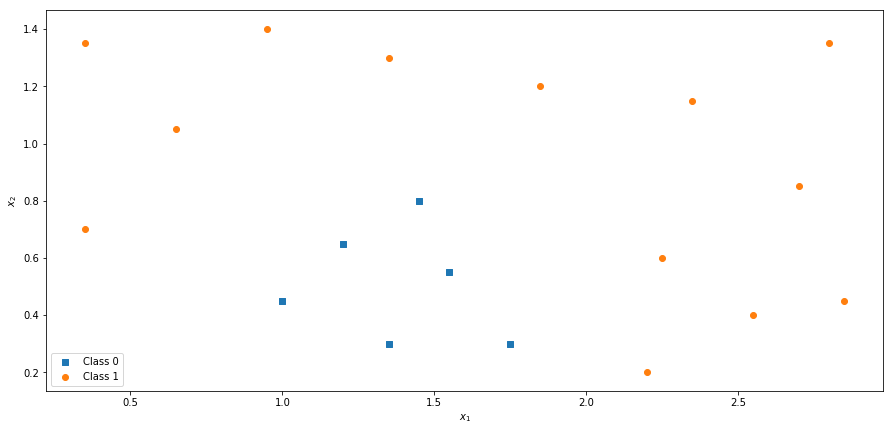

In [2]:
import numpy as np
from matplotlib import pyplot as plt
try:
    import seaborn  # provides fancy plotting styles
    seaborn.set_style('darkgrid')
except:
    print('seaborn package not available.')

X = np.array([[0.35, 0.7], [0.35, 1.35], [0.65, 1.05], [0.95, 1.4], [1.35, 1.3], [1.85, 1.2], [2.35, 1.15], [2.25, 0.6], [2.2, 0.2], [2.55, 0.4], [2.7, 0.85], [2.8, 1.35], [2.85, 0.45],
              [1, 0.45], [1.2, 0.65], [1.35, 0.3], [1.45, 0.8], [1.55, 0.55], [1.75, 0.3]])
y = np.array([1] * 13 + [0] * 6)

plt.figure(figsize=(15,7))
plt.scatter(*X[y==0].T, marker='s', label="Class 0")
plt.scatter(*X[y==1].T, marker='o', label="Class 1")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## Task I: Linear Classification
The dataset (X,y) poses a 2d classification problem: Each pair $(x_1,x_2)$ of features is associated to one of the two classes, 0 or 1.

1. Explain why the classes are not linearly separable if we consider the feature vectors $\mathbf{x}=(x_1,x_2)^T$.
2. Does the situation change if we write the same points as higher-dimensional feature vectors $\mathbf{x}=(x_1,x_1^2,x_2)^T$?  
   Visualize the features in a [3d scatter plot](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) and look at 2d scatter plots of $(x_1, x_1^2)$ and $(x_1^2,x_2)$.

## Task II: Fisher-Classification

1. Create a two-dimensional dataset with samples drawn from two Gaussian-distributed classes $C_1$ and $C_2$ as follows:
   - The samples in $C_1$ should have mean $\mu_1 = (1, 0)^T$ and covariance matrix $\Sigma = \begin{pmatrix}  0.5 & -0.3 \\  -0.3 &  0.5\end{pmatrix}$
   - The samples in $C_2$ should have mean $\mu_2 = (-1, 0)^T$ and the same covariance matrix $\Sigma$.

2. Based on the true probability distribution, compute the Fisher discriminant $(\mathbf{w}^*, b^*)$.  
   Project the 2d data onto $\mathbf{w}^*$ and [plot a histogram](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) of those scalars, colored differently based on the class to yield a figure similar to the slide "Nearest Neighbor vs. Fisher Classifier".

3. Draw at random 10, 100, 500 samples from the dataset as training data and compute the Fisher discriminants for these samples, i.e. the empirically determined $(\hat{\mathbf w}, \hat{b})$.  
   How do they differ compared to $(\mathbf{w}^*, b^*)$? Test the classification accuracy of each discriminant on an independent test set comprising 200 samples.

   Plot the training and test samples together with the class boundary computed by the Fisher classifier.

## Task III: Perceptron

Implement a perceptron and the perceptron learning rule to train a linear classification task on a generic dataset $\{(\mathbf{x}^\alpha, c^\alpha)\}_{\alpha \in \{1, \dotsc, M\}}$ with $K$ classes, i.e.: 
* `classify(x)`: $\hat{c}(\mathbf{x}) = \operatorname{argmax}_{i=1, \dotsc K} \mathbf y(\mathbf x)$ where $\mathbf y(\mathbf x) = \mathbf W \cdot \mathbf x$
* `train(x,c,ĉ)`: `if` $\hat{c} \neq c$ (false classification):
  * $\Delta w_{\hat c} = -x_\alpha$ (decrease weight of wrong neuron)
  * $\Delta w_{c} = +x_\alpha$ (increase weight corresponding to correct neuron)

Use numpy matrix expressions to compute the output vector $\mathbf y(\mathbf x)$ (the discriminants) of the perceptron.  
For a multi-class problem, chose $K$ outputs and determine the predicted class via [`argmax`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

To implement the bias term, you can simply augment your feature vectors with a constant $1$: $\mathbf x' = (1, \mathbf x)$.  
Consequently, the weight vectors $\mathbf w$ will have one more dimension as well and you can interpret $w_0$ as the bias term $b$: $\mathbf w' \cdot \mathbf x' = w_0 \cdot 1 +  \mathbf w \cdot \mathbf x$.

## Task IV: Perceptron Classificaton

Apply your perceptron to the following classification tasks:

1. The feature set from Task I.2, i.e. $\mathbf x = (1, x_1, x_1^2, x_2)^T$. Visualize the class boundary (a plane) in your scatter plot.
2. The dataset from Task II, using 500 samples. Visualize the class boundary and compare your results with Task II.